# **9. Problemas matemáticos resueltos de manera númerica - Scipy**

En esta parte del curso estaremos estudiando la librería Scipy, la cuál nos brinda una serie de algoritmos matemáticos como herramientas muy útiles para resolver de forma númerica una gran cantidad de los problemas más comunes a los que se enfrenta un estudiante de ciencias e ingeniería.

Esta librería está dividida en los siguientes subpaquetes:

Subpaquete | Descripción
--- | ---
cluster | Clustering algorithms
constants | Physical and mathematical constants
fftpack | Fast Fourier Transform routines
integrate | Integration and ordinary differential equation solvers
interpolate | Interpolation and smoothing splines
io | Input and Output
linalg | Linear algebra
ndimage | N-dimensional image processing
odr | Orthogonal distance regression
optimize | Optimization and root-finding routines
signal | Signal processing
sparse | Sparse matrices and associated routines
spatial | Spatial data structures and algorithms
special | Special functions
stats | Statistical distributions and functions


Nosostros prestaremos especial atención en las siguientes:



> Bloque con sangría

1.   Funciones especiales
2.   Integración
3.   Problemas del Álgebra Lineal
4.   Estadísticas
5.   Transformadas de Fourier*

Se espera y se supondrá que el usuario llame siempre a las siguientes librerías para el uso de Scipy:



In [ ]:
import scipy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

Y tambien es importante resaltar que los subpaquetes de Scipy se deben importar por separado

Por ejemplo:


In [ ]:
from scipy import linalg, optimize

## 9.1 Funciones Especiales

El modulo scipy.special nos permite hacer un uso directo de numerosas funciones especiales de la física matemática.

Funciones especiales como por ejemplo:

*   airy, 
*   elíptica, 
*   bessel, 
*   gamma
*   beta
*   hipergeométrica
*   cilindro 
*   parabólico
*   mathieu
*   onda
*   esferoidal
*   struve
*   kelvin



In [ ]:
from scipy import special
help(special)

Help on package scipy.special in scipy:

NAME
    scipy.special

DESCRIPTION
    Special functions (:mod:`scipy.special`)
    
    .. currentmodule:: scipy.special
    
    Nearly all of the functions below are universal functions and follow
    broadcasting and automatic array-looping rules.
    
    .. seealso::
    
       `scipy.special.cython_special` -- Typed Cython versions of special functions
    
    
    Error handling
    
    Errors are handled by returning NaNs or other appropriate values.
    Some of the special function routines can emit warnings or raise
    exceptions when an error occurs. By default this is disabled; to
    query and control the current error handling state the following
    functions are provided.
    
    .. autosummary::
       :toctree: generated/
    
       geterr                 -- Get the current way of handling special-function errors.
       seterr                 -- Set how special-function errors are handled.
       errstate              

### Aspectos relevantes


La mayoría de estas funciones pueden tomar argumentos de arreglos y devolver resultados de arreglos siguiendo las mismas reglas de transmisión que otras funciones matemáticas en Numerical Python.


Muchas de estas funciones también aceptan números complejos como entrada. 


Para obtener una lista completa de las funciones disponibles con un tipo de descripción de una línea>>> help(special).


Cada función también tiene su propia documentación accesible mediante la ayuda.

### ¿Cómo usar estas funciones?

De manera muy general puede hacerlo con la siguiente estructura:

> special. [nombre de la fn. deseada] (args)

Nota: Los argumentos dependen de la función deseada, para ello consulte la documentación

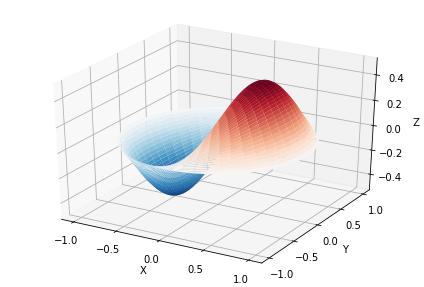

In [ ]:
from scipy import special                                                         # Importamos el modulo para funciones especiales

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def drumhead_height(n, k, distance, angle, t):
   kth_zero = special.jn_zeros(n, k)[-1]                                          # Notece como hacemos uso del modulo para usar una función especial de Bessel
   return np.cos(t) * np.cos(n*angle) * special.jn(n, distance*kth_zero)

theta = np.r_[0:2*np.pi:50j]
radius = np.r_[0:1:50j]
x = np.array([r * np.cos(theta) for r in radius])
y = np.array([r * np.sin(theta) for r in radius])
z = np.array([drumhead_height(1, 1, r, theta, 0.5) for r in radius])


fig = plt.figure()
ax = Axes3D(fig, rect=(0, 0.05, 0.95, 0.95))
ax.plot_surface(x,y,z, rstride=1, cstride=1, cmap='RdBu_r', vmin=-0.5, vmax=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xticks(np.arange(-1, 1.1, 0.5))
ax.set_yticks(np.arange(-1, 1.1, 0.5))
ax.set_zlabel('Z')
plt.show()

## 9.2 Integración númerica

El subpaquete **scipy.integrate** proporciona varias técnicas de integración, incluido un solucionador de ecuaciones diferenciales ordinarias. 

Para obetener una descripción general del módulo, ejecute el siguiente comando de ayuda:

> help(integrate)

In [ ]:
from scipy import  integrate
help(integrate)

Help on package scipy.integrate in scipy:

NAME
    scipy.integrate

DESCRIPTION
    Integration and ODEs (:mod:`scipy.integrate`)
    
    .. currentmodule:: scipy.integrate
    
    Integrating functions, given function object
    
    .. autosummary::
       :toctree: generated/
    
       quad          -- General purpose integration
       quad_vec      -- General purpose integration of vector-valued functions
       dblquad       -- General purpose double integration
       tplquad       -- General purpose triple integration
       nquad         -- General purpose n-dimensional integration
       fixed_quad    -- Integrate func(x) using Gaussian quadrature of order n
       quadrature    -- Integrate with given tolerance using Gaussian quadrature
       romberg       -- Integrate func using Romberg integration
       quad_explain  -- Print information for use of quad
       newton_cotes  -- Weights and error coefficient for Newton-Cotes integration
       IntegrationWarning -- Wa

### 9.2.1 Integración de funciones de una variable

La función **quad** nos sirve para integrar una función de una variable entre dos puntos. 

Nota: Los puntos pueden ser (-inf, inf) para indicar límites infinitos. 

Por ejemplo, suponga que desea integrar una función de bessel jv(2.5, x) en el intervalo [0, 4.5]

Es decir:

$$ I = \int_{0}^{4.5} J_{2.5}(x) dx $$

Esta integral puede facilmente resolverse con el modulo integrate de scipy

In [ ]:
import scipy.integrate as integrate
import scipy.special as special
result = integrate.quad(lambda x: special.jv(2.5,x), 0, 4.5)
print(result)

(1.1178179380783253, 7.866317182537226e-09)


Ahora veamos los detalles del código anterior

```
# result = integrate.quad(lambda x: special.jv(2.5,x), 0, 4.5)
```
Notemos que evaluamos la integral en una variable llamada result, en la cual llamamos al subpaquete integrate.quad (para resolver la ecuación de una variable) y le damos tres argumentos, de manera ordenada son:



1.   Un objeto "llamable de python", en este caso una función lambda
2.   El límite inferior de integración
3.   El límite superior

Y nos arroja una lista con dos elementos, el primero nos dice el valor de la integral definida y el segundo el error estimado.

Veamos otro ejemplo:

Evaluemos 

$$ \int_{- \infty }^{ \infty } sen(x)dx $$

Como 

$$ \int sen(x)dx = cos(x) + C $$

Y la función coseno es par entonces la integral definida debería dar igual a cero.

Para hacer más variado el ejemplo, ahora usemos otro objeto "llamable" distinto a las funciones lambda

In [ ]:
def seno(x):
  return np.sin(x)

result = integrate.quad(seno, -np.inf, np.inf)
print(result)

(0.0, 0.0)


Observamos que Scipy no tiene problemas para evaluar límites de integración al infinito y claramente da un resultado excelente.

Scipy nos da soporte para integrar funciones con paramétros adicionales

Por ejemplo, en la integral

$$ I(a,b) = \int_{0}^{1} \left( ax^{2}+b \right) dx $$

Observamos que es necesario conocer los valores de los parametros a,b para evaluar la integral, lo cual podemos evaluar de la siguiente manera:

In [ ]:
def integrando(x, a, b):
    return a*x**2 + b

# Paramétros
a = 2
b = 1

I = integrate.quad(integrando, 0, 1, args=(a,b))

print(I)

(1.6666666666666667, 1.8503717077085944e-14)


## 9.2.2 Integrales dobles

Consideremos la siguiente integral doble:

$$ I = \int_{y=0}^{1/2} \int_{x=0}^{1-2y} xydxdy $$

Podemos evaluarla de la siguiente manera:


In [ ]:
from scipy.integrate import dblquad
result = integrate.dblquad(lambda x, y: x*y, 0, 0.5, lambda x: 0, \
                           lambda x: 1-2*x)                                       # Notemos que integrate.dblquad recibió 5 argumentos
print(result)

(0.010416666666666668, 4.101620128472366e-16)


De forma ordenada estudiemos dichos argumentos:



1.   Objeto llamable que represente la función a integrar
2.   Límite de integración inferior (integral exterior)
3.   Límite de integración superior (integral exterior)
4.   Objeto llamable que representa el límite de integración inferior         (integral interior)
5.   Objeto llamable que representa el límite de integración superior (integral interior)

Observación: considere el uso de las funciones lambda para las integrales internas

Para ejemplicar resolvamos lo siguiente:

$$ I = \int_{y=0}^{1} \int_{x=0}^{4y} e^{ x^{y} } dxdy $$

Lo hacemos de la siguiente forma:


In [ ]:
from scipy.integrate import dblquad 

result = integrate.dblquad(lambda x, y: np.e**(x**y), 0, 1, \
                           lambda x: 0, lambda x: 4*x)  

print(result)

(10.047394700688073, 6.36384753933157e-07)


## 9.2.3 Integrar n-veces

Para la integración de n veces, scipy proporciona la función **nquad**. 
Los límites de integración son un objeto iterable: una lista de límites constantes o una lista de funciones para los límites de integración no constantes. 

Observación: El orden de integración (y por lo tanto los límites) es de la integral más interna a la más externa.

Ejemplo la integral anterior puede evaluarse de la siguiente manera:




In [ ]:
from scipy import integrate
def f(x, y):
    return x*y

def bounds_y():
    return [0, 0.5]

def bounds_x(y):
    return [0, 1-2*y]

integrate.nquad(f, [bounds_x, bounds_y])

(0.010416666666666668, 4.101620128472366e-16)

O la siguiente integral cuatruple:

$$ \int_{y=0}^{5} \int_{x=0}^{4} \int_{z=0}^{3} \int_{t=0}^{2} (xyz^{n}e^{t}) dtdzdxdy $$

de la siguiente manera:



In [ ]:
from scipy import integrate

fn = lambda x,y,z,t,n : x*y*(z**n)*(np.e**t)

# Para el caso donde n=5, simplemente por hacer uso de los parametros arbitrarios
n  = 5

result = integrate.nquad( fn, [ [0, 2], [0,3], [0, 4], \
                               [0,5] ], args=[5] )

print(result)

(905706.4495262306, 1.485900154994994e-08)


## 9.2.4 Integración usando pares 

En caso de un número de puntos arbitrarios, las dos funciones **trapezoid** y **simpson** están disponibles. Están usando fórmulas de Newton-Coates de orden 1 y 2 respectivamente para realizar la integración.

Para un número impar de muestras que están igualmente espaciadas, la regla de Simpson es exacta si la función es un polinomio de orden 3 o menos. Si las muestras no están igualmente espaciadas, el resultado es exacto solo si la función es un polinomio de orden 2 o menos.

Para ejemplificar resolvamos las siguientes integrales:


$$ \int_{1}^{4} x^{2} dx = 21 $$




In [ ]:
from scipy.integrate import simps

fn = lambda x: x**2

X = np.array([1,3,4])
Y=fn(X)

result = integrate.simps(Y, X)

print(result)


21.0


Notemos que el resultado es exacto por que usamos el método de simpson y el número de puntos a pesar de no estar equidistantes en su coordenada en el eje X sigue siendo exacto ya que el polinomio es de grado menor o igual a dos, tal como menciona la documentación.

Ahora la siguiente integral

$$ \int_{1}^{4} x^{3} dx = 63.75 $$




In [ ]:
fn = lambda x: x**3

X = np.array([1,3,4])
Y=fn(X)

result = integrate.simps(Y, X)

print(result)

61.5


Observamos que el resultado no es exacto porque no la función es de grado mayor a 2, sin embargo, usamos una cantidad muy pequeña de puntos y el método de integración es muy versatil a cualquier tipo de funciones.


## 9.3 Álgebra Lineal

Ahora aprenderemos a resolver los problemas más comunes dentro del álgebra lineal y el algebrá matricial, como por ejemplo:


1.   Multiplicación de matrices
2.   Calcular la inversa de una matriz
3.   Calcular el determinante de una matriz
4.   Resolver un sistema de ecuaciones lineales
5.   Hallar eigenvalores y eigenvectores

Esto lo haremos con la librería **Numpy**

### 9.3.1 Multiplicación de matrices

Si queremos realizar el producto metricial de dos matrices usaremos el comando:
>**numpy.matmul**

Por ejemplo, dadas las siguientes matrices:

$$ A = \begin{bmatrix} 
      1 & 3 & 5 \\
      2 & 5 & 1 \\
      2 & 3 & 8     
\end{bmatrix} $$ 

$$ B = \begin{bmatrix} 
      1 & 2 & 3 \\
      4 & 5 & 6 \\
      7 & 8 & 9     
\end{bmatrix} $$ 

$$ C = \begin{bmatrix} 
      1 & 0 & 0 \\
      0 & 1 & 0 \\
      0 & 0 & 1     
\end{bmatrix} $$ 

Sabemos que:

$$ AC = \begin{bmatrix} 
      1 & 3 & 5 \\
      2 & 5 & 1 \\
      2 & 3 & 8     
\end{bmatrix} = CA $$

$$ $$

$$ AB = \begin{bmatrix} 
      48 & 57 & 66 \\
      29 & 37 & 45 \\
      70 & 83 & 96     
\end{bmatrix} $$ 

$$ $$

$$ BA = \begin{bmatrix} 
      11 & 22 & 31 \\
      26 & 55 & 73 \\
      41 & 88 & 115     
\end{bmatrix} $$ 

$$ $$

Realicemos las anteriores operaciones de forma computacional con Numpy:




In [ ]:
import numpy as np

A = np.array( [ [1,3,5],[2,5,1],[2,3,8] ] )
B = np.array( [ [1,2,3],[4,5,6],[7,8,9] ] )
C = np.array( [ [1,0,0],[0,1,0],[0,0,1] ] )

In [ ]:
# AC
AC = np.matmul(A,C)
print(AC)

[[1 3 5]
 [2 5 1]
 [2 3 8]]


In [ ]:
# CA
CA = np.matmul(C,A)
print(CA)

[[1 3 5]
 [2 5 1]
 [2 3 8]]


In [ ]:
# AB
AB = np.matmul(A,B)
print(AB)

[[48 57 66]
 [29 37 45]
 [70 83 96]]


In [ ]:
# BA
BA = np.matmul(B,A)
print(BA)

[[ 11  22  31]
 [ 26  55  73]
 [ 41  88 115]]


Efectivamente vemos que se han realizado correctamente las operaciones.

Pero ahora veamos un comando algo más general y poderoso:
>**numpy.dot(a,b)**

Con este comando tenemos los siguientes casos:



*   Si a,b son unidimensionales, numpy.dot(a,b) nos da el producto interno de dichos vectores
*   Si a,b son matrices, numpy.dot(a,b) nos da la multiplicación matricial de dichas matrices
*   Si a o b es un escalar entonces tenemos multiplicación por escalar, equivalente a a*b

Realicemos algunas operaciones con numpy.dot considerando:

$$ v = (1,1,1) $$
$$             $$
$$ u = (1,2,0) $$


In [ ]:
# u punto v 

v = (1,1,1)
u = (1,2,0)

uv = np.dot(u,v)
print(uv)

3


In [ ]:
# v punto u
print(np.dot(v,u))

3


In [ ]:
# AB
print(np.dot(A,B))

[[48 57 66]
 [29 37 45]
 [70 83 96]]


In [ ]:
# BA
print(np.dot(B,A))

[[ 11  22  31]
 [ 26  55  73]
 [ 41  88 115]]


In [ ]:
# 3C
print(np.dot(3,C))

[[3 0 0]
 [0 3 0]
 [0 0 3]]


### 9.3.2 Inversa de una matriz

La inversa de una matriz $A$ es la matriz $B$ , tal que $AB=I$ , dónde $I$ es la matriz de identidad que consta de unos en la diagonal principal. Generalmente, se denota $B=A^{-1}$ .


En Scipy la matriz inversa de un arreglo de Numpy, A, puede obtenerse con el comando:

>**linalg.inv(A)**

Por ejemplo, si:

$$ A= \begin{bmatrix} 
      1 & 3 & 5 \\
      2 & 5 & 1 \\
      2 & 3 & 8     
\end{bmatrix} $$ 

Hallamos su inversa de la siguiente forma:

In [ ]:
import scipy
import numpy as np
from scipy import linalg

A = np.array( [ [1,3,5], [2,5,1], [2,3,8] ] )
Inversa = linalg.inv(A) 
print( Inversa)

[[-1.48  0.36  0.88]
 [ 0.56  0.08 -0.36]
 [ 0.16 -0.12  0.04]]


Cuando una matriz no tenga inversa como:

$$ A= \begin{bmatrix} 
      1 & 2 & 3 \\
      4 & 5 & 6 \\
      7 & 8 & 9     
\end{bmatrix} $$

Veremos un **error de ejecución**

>**LinAlgError: singular matrix**

Como se observa a continuación



In [ ]:
A = np.array( [ [1,2,3], [4,5,6], [7,8,9] ] )
Inversa = linalg.inv(A) 
print( Inversa)

LinAlgError: ignored

## 9.3.3 Determinante de una matriz

A continuación veremos como calcular el determinante de una matriz, en este caso con el comando:

>**numpy.linalg.det**

Calculemos el de las matrices A, y C vistas anteriormente:

In [ ]:
# Determinante de A
print(np.linalg.det(A))

-25.000000000000007


In [ ]:
# Determinante de B
print(np.linalg.det(B))

0.0


In [ ]:
# Determinante de C
print(np.linalg.det(C))

1.0


Notemos que el determinante de A y C es disntito de cero lo cual es disitinto de cero lo cual es consistente, ya que son invertibles, mientras que el determinante de B es igual a cero lo que nos confirma que dicha matriz es no invertible.

## Sistema de ecuaciones lineales

Resolver una ecuación lineal matricial o un sistema de ecuaciones lineales.

Calcula la solución "exacta", x , de la ecuación de matriz lineal de la forma:

$$ AX=B $$

Dados:

$$ A= \begin{bmatrix} 
        3 & 1 \\
        1 & 2      
\end{bmatrix} $$

$$ $$

$$ B= \begin{bmatrix} 
        9 \\
        8       
\end{bmatrix} $$

Hallar $$ X= \begin{bmatrix} 
        x_{1} \\
        x_{2}       
\end{bmatrix} $$

tal que AX=B

Esto es posible computarlo con el siguiente comando:
>**numpy.linalg.solve(a,b)**

Computemos el ejemplo anterior

In [ ]:
import numpy as np

a = np.array([[3,1], [1,2]])
b = np.array([9,8])
x = np.linalg.solve(a, b)
print(x)

[2. 3.]


In [ ]:
# Comprobamos multiplicando A y X
print(np.dot(a,x))

[9. 8.]


Observemos que AX nos regresa exactamente a B, por tanto vemos que funciona correctamente este comando.

## 9.3.4 Eigenvalores y eigenvectores

Dada una matriz cuadrada A es posible hallar sus eigen valores y eigen vectores con unas pocas lineas de código mediante la librería Numpy con el siguiente comando:

>**numpy.linalg.eig(A)**

Dada la matriz:

$$ A = \begin{bmatrix} 
          1 & 0 & 0 \\
          0 & 2 & 0 \\
          0 & 0 & 3 
\end{bmatrix} $$

Buscaremos sus valores propios y vectores propios con el modulo Numpy

In [ ]:
eigenvalores, eigenvectores = np.linalg.eig(np.diag((1, 2, 3)))

In [ ]:
# Eigenvalores
print(eigenvalores)

[1. 2. 3.]


In [ ]:
# Eigenvectores
print(eigenvectores)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


# 9.4 Estadística 